In [1]:
# !pip install sqlalchemy==1.4.7
# !pip install ibm_db_sa
# !pip install ipython-sql

In [2]:
# found panadas_profiling in a Titanic machine learning article. Had to run in Python Data environment.
import pandas as pd
from pandas_profiling import ProfileReport
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [3]:
host = "localhost"
database = "Titanic_Combined_sql"
user = "postgres"
password = "@Princess21"

In [4]:
# Import SQL into Jupyter - Module 8.5.1 code
db_string = f"postgresql://{user}:{password}@{host}/{database}"

In [5]:
engine = create_engine(db_string)

In [6]:
insp = inspect(engine)
insp.get_table_names()

['rms_titanic_passengers_and_crew',
 'rms_titanic_country_of_residency',
 'titanic',
 'titanic_survivors',
 'titanic_combined_sql',
 'filtered_data']

In [7]:
# Create a JOIN. Join 2 tables from SQL
titanic_combined = ('SELECT * FROM RMS_titanic_passengers_and_crew AS p\
                        LEFT JOIN RMS_Titanic_country_of_residency AS r\
                            ON p.index = r.mainID\
                        LEFT JOIN Titanic AS t\
                            ON p.index = t.main_key\
                        LEFT JOIN Titanic_Survivors AS s\
                            ON p.index = s.index')
result_set = engine.execute(titanic_combined)
result_set = pd.DataFrame(result_set)
result_set.head()

0                  1       2       3     4     5       6        7   \
0  435  Browne Francis M.  1880.0  1960.0  32.0  80.0    Male   Single   
1  454      Nichols Emily  1863.0     NaN  48.0   NaN  Female  Widowed   
2  459         Odell Lily  1871.0  1966.0  40.0  95.0  Female  Married   
3  465          Brewer B.  1888.0     NaN  24.0   NaN    Male     None   
4  466        Coffey John  1889.0  1957.0  23.0  68.0    Male  Married   

          8          9   ...    41    42    43  44    45    46    47    48  \
0  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
1  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
2  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
3       Crew     Engine  ...  None  None  None NaN  None  None  None  None   
4       Crew     Engine  ...  None  None  None NaN  None  None  None  None   

     49  50  
0  None NaN  
1  None NaN  
2  None NaN  
3  None NaN  
4  None NaN  

[5 rows x 51 columns]

In [8]:
# Import the data from SQL
df_titanic = pd.read_sql('SELECT * FROM filtered_data', engine)
df_titanic

index              passenger_name    born    died   age  age_at_death  \
0     1000               Cohen Gurshon  1892.0  1978.0  19.0          85.0   
1     1001             Colbert Patrick  1887.0  1912.0  24.0          24.0   
2     1002       Coleman Albert Edward  1883.0  1912.0  28.0          28.0   
3     1003                Coleman John  1854.0  1912.0  57.0          57.0   
4     1004  Coleridge Reginald Charles  1883.0  1912.0  29.0          29.0   
...    ...                         ...     ...     ...   ...           ...   
2418   995         Clench George James  1881.0  1912.0  31.0          31.0   
2419   996      Clifford George Quincy  1871.0  1912.0  40.0          40.0   
2420   997             Cochrane Robert  1867.0     NaN  44.0           NaN   
2421   998                   Coe Harry  1890.0  1912.0  21.0          21.0   
2422   999   Coelho Domingos Fernandeo  1891.0  1912.0  20.0          20.0   

     gender marital_status   category ticket_class  ...  \
0      Male         Single  Passenger    3rd Class  ...   
1      Male         Single  Passenger    3rd Class  ...   
2      Male        Married       Crew  Victualling  ...   
3      Male        Married       Crew       Engine  ...   
4      Male         Single  Passenger    2nd Class  ...   
...     ...            ...        ...          ...  ...   
2418   Male         Single       Crew         Deck  ...   
2419   Male        Married  Passenger    1st Class  ...   
2420   Male        Married       Crew       Engine  ...   
2421   Male        Married       Crew       Engine  ...   
2422   Male         Single  Passenger    3rd Class  ...   

                             job pclass survived sibsp parch   fare  boat  \
0           Printer / Compositor   None      NaN   NaN   NaN    NaN  None   
1                 Railway Porter      3      0.0   0.0   0.0   7.25  None   
2     Saloon Steward (1st class)   None      NaN   NaN   NaN    NaN  None   
3        Engineers' Mess steward   None      NaN   NaN   NaN    NaN  None   
4         Advertising Consultant      2      0.0   0.0   0.0  10.50  None   
...                          ...    ...      ...   ...   ...    ...   ...   
2418                 Able Seaman   None      NaN   NaN   NaN    NaN  None   
2419                        None   None      NaN   NaN   NaN    NaN  None   
2420                        None   None      NaN   NaN   NaN    NaN  None   
2421                     Trimmer   None      NaN   NaN   NaN    NaN  None   
2422                        None      3      0.0   0.0   0.0   7.05  None   

      body country_id2  survived_y_n  
0     None         359           1.0  
1     None        1489           0.0  
2     None         360           0.0  
3     None         361           0.0  
4     None         362           0.0  
...    ...         ...           ...  
2418  None         356           0.0  
2419  None        1904           0.0  
2420  None        None           0.0  
2421  None         357           0.0  
2422  None        None           0.0  

[2423 rows x 27 columns]

In [9]:
# describe the data set
df_titanic.describe()

born         died          age  age_at_death    survived  \
count  2416.000000  2269.000000  2416.000000   2270.000000  639.000000   
mean   1880.493377  1925.360071    30.977649     44.098238    0.483568   
std      12.094279    21.779365    12.112085     22.953141    0.500121   
min    1837.000000  1912.000000     0.000000      0.000000    0.000000   
25%    1873.000000  1912.000000    23.000000     26.000000    0.000000   
50%    1882.000000  1912.000000    30.000000     37.000000    0.000000   
75%    1889.000000  1939.000000    39.000000     63.000000    1.000000   
max    1912.000000  2009.000000    74.000000    104.000000    1.000000   

            sibsp       parch        fare  survived_y_n  
count  639.000000  639.000000  639.000000   2423.000000  
mean     0.593114    0.525822   43.549655      0.293851  
std      0.930340    0.917715   58.804085      0.455618  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000    0.000000   10.170850      0.000000  
50%      0.000000    0.000000   26.000000      0.000000  
75%      1.000000    1.000000   52.000000      1.000000  
max      5.000000    6.000000  512.329200      1.000000

In [10]:
# Learned and read from internet reading up on the Kaggle titanic project about Exploratory Data Analysis https://www.activestate.com/blog/how-to-use-machine-learning-to-determine-titanic-survivors/. 
# This is using the panadas_profiling library.
eda_report = ProfileReport(df_titanic)
eda_report

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Initial imports. This code is directly from Module 17.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Exploring Dataset

In [12]:
# get dtypes
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   df_index              2423 non-null   object 
 1   passenger_name        2423 non-null   object 
 2   born                  2416 non-null   float64
 3   died                  2269 non-null   float64
 4   age                   2416 non-null   float64
 5   age_at_death          2270 non-null   float64
 6   gender                2423 non-null   object 
 7   marital_status        1828 non-null   object 
 8   category              2423 non-null   object 
 9   ticket_class          2422 non-null   object 
 10  job_group             90 non-null     object 
 11  ticket                1317 non-null   object 
 12  cabin                 308 non-null    object 
 13  embarked              2422 non-null   object 
 14  disembarked           926 non-null    object 
 15  country_of_residence 

In [13]:
df_titanic[['gender', 'survived_y_n']].groupby(['gender'], as_index=False).mean()

gender  survived_y_n
0  Female      0.734151
1    Male      0.182523

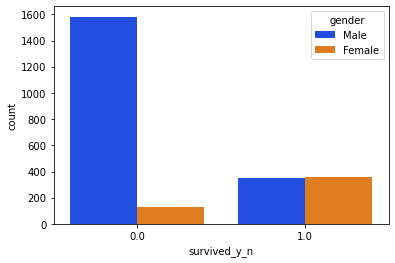

In [14]:
# number of survivors based on gender
sns.countplot(x="survived_y_n", hue = "gender", palette="bright", data = df_titanic)
plt.show()

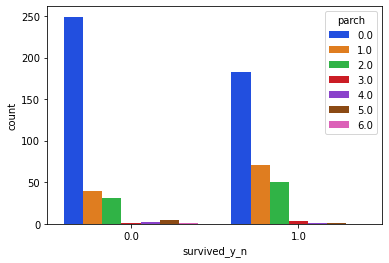

In [15]:
# number of survivors based on family member - parch (parents)
sns.countplot(x="survived_y_n", hue = "parch", palette="bright", data = df_titanic)
plt.show()

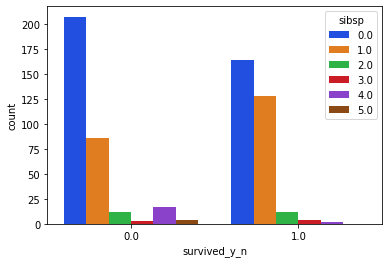

In [16]:
# number of survivors based on family member - siblings (sibsp)
sns.countplot(x="survived_y_n", hue = "sibsp", palette="bright", data = df_titanic)
plt.show()

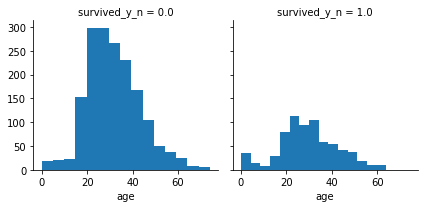

In [17]:
# survived by age. code found at a titanic Kaggle review.
age = sns.FacetGrid(df_titanic, col='survived_y_n')
age.map(plt.hist, 'age', bins=15)

In [18]:
# Found code for children who survived and did not survivied. Used 16 as cut-off for children.
df_titanic.loc[(df_titanic['age'] > 16) & (df_titanic['gender'] == 'Male'), 'group']  = "Men"
df_titanic.loc[(df_titanic['age'] < 16), 'group'] = 'Child'
df_titanic.loc[(df_titanic['age'] > 16) & (df_titanic['gender'] == 'Female'), 'group'] = 'Women'
df_titanic

df_index              passenger_name    born    died   age  age_at_death  \
0        1000               Cohen Gurshon  1892.0  1978.0  19.0          85.0   
1        1001             Colbert Patrick  1887.0  1912.0  24.0          24.0   
2        1002       Coleman Albert Edward  1883.0  1912.0  28.0          28.0   
3        1003                Coleman John  1854.0  1912.0  57.0          57.0   
4        1004  Coleridge Reginald Charles  1883.0  1912.0  29.0          29.0   
...       ...                         ...     ...     ...   ...           ...   
2418      995         Clench George James  1881.0  1912.0  31.0          31.0   
2419      996      Clifford George Quincy  1871.0  1912.0  40.0          40.0   
2420      997             Cochrane Robert  1867.0     NaN  44.0           NaN   
2421      998                   Coe Harry  1890.0  1912.0  21.0          21.0   
2422      999   Coelho Domingos Fernandeo  1891.0  1912.0  20.0          20.0   

     gender marital_status   category ticket_class  ... pclass survived sibsp  \
0      Male         Single  Passenger    3rd Class  ...   None      NaN   NaN   
1      Male         Single  Passenger    3rd Class  ...      3      0.0   0.0   
2      Male        Married       Crew  Victualling  ...   None      NaN   NaN   
3      Male        Married       Crew       Engine  ...   None      NaN   NaN   
4      Male         Single  Passenger    2nd Class  ...      2      0.0   0.0   
...     ...            ...        ...          ...  ...    ...      ...   ...   
2418   Male         Single       Crew         Deck  ...   None      NaN   NaN   
2419   Male        Married  Passenger    1st Class  ...   None      NaN   NaN   
2420   Male        Married       Crew       Engine  ...   None      NaN   NaN   
2421   Male        Married       Crew       Engine  ...   None      NaN   NaN   
2422   Male         Single  Passenger    3rd Class  ...      3      0.0   0.0   

     parch   fare  boat  body country_id2 survived_y_n  group  
0      NaN    NaN  None  None         359          1.0    Men  
1      0.0   7.25  None  None        1489          0.0    Men  
2      NaN    NaN  None  None         360          0.0    Men  
3      NaN    NaN  None  None         361          0.0    Men  
4      0.0  10.50  None  None         362          0.0    Men  
...    ...    ...   ...   ...         ...          ...    ...  
2418   NaN    NaN  None  None         356          0.0    Men  
2419   NaN    NaN  None  None        1904          0.0    Men  
2420   NaN    NaN  None  None        None          0.0    Men  
2421   NaN    NaN  None  None         357          0.0    Men  
2422   0.0   7.05  None  None        None          0.0    Men  

[2423 rows x 28 columns]

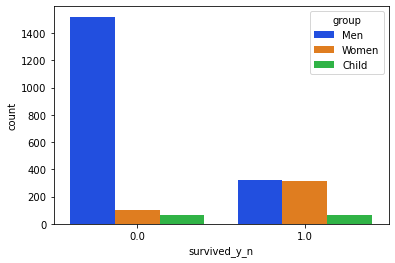

In [19]:
# number of survivors based on group - men, women, child
sns.countplot(x="survived_y_n", hue = "group", palette="bright", data = df_titanic)
plt.show()

In [20]:
df_titanic[['group', 'survived_y_n']].groupby(['group'], as_index=False).mean()

group  survived_y_n
0  Child      0.500000
1    Men      0.174362
2  Women      0.755981

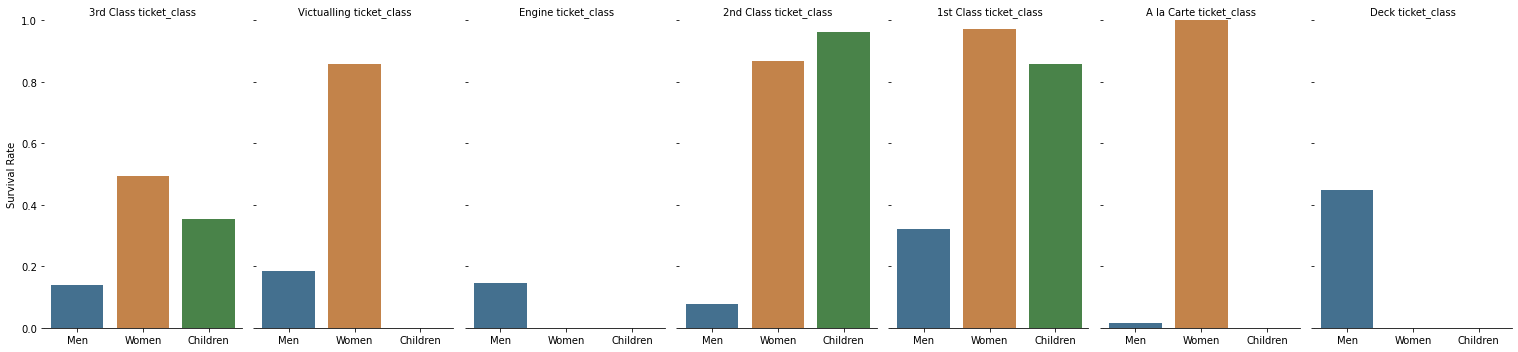

In [21]:
# directly from https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot. It's super cool.
# Survival rate of women, men and children based on ticket class
t = sns.catplot(x="group", y="survived_y_n", col="ticket_class",
                data=df_titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(t.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

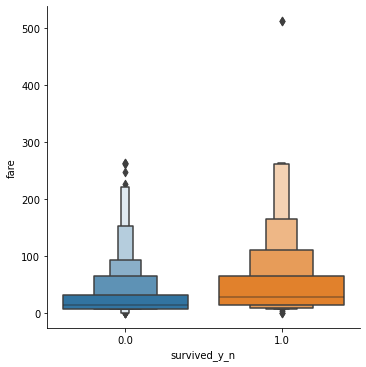

In [22]:
ax = sns.catplot(x="survived_y_n", y="fare", data=df_titanic, kind="boxen")

Text(0, 0.5, '% Survived')

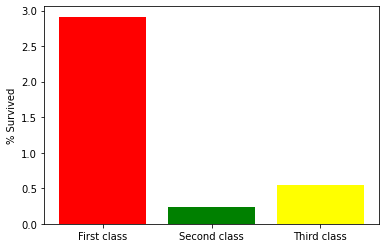

In [23]:
# trying plt.subplot found in Titanc documentation and verified on matplotlib - the base structure that is
# percentage survived by ticket class
fig, ax = plt.subplots()
ticketclass_count = df_titanic['ticket_class'].value_counts(sort=False)
survive_count = df_titanic.loc[df_titanic['survived_y_n'] == 1, ['ticket_class']].value_counts(sort=False)
ax.bar('First class', survive_count.iloc[0]/ticketclass_count.iloc[0], color='red')
ax.bar('Second class', survive_count.iloc[1]/ticketclass_count.iloc[1], color='green')
ax.bar('Third class', survive_count.iloc[2]/ticketclass_count.iloc[2], color='yellow')
ax.set_ylabel('% Survived')

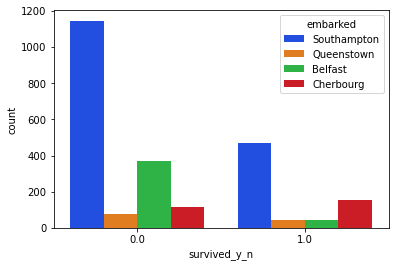

In [24]:
# number of survivors by where embarked(got on the boat)
sns.countplot(x="survived_y_n", hue = "embarked", palette="bright", data = df_titanic)
plt.show()

C:\Users\saral\Anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saral\Anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saral\Anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

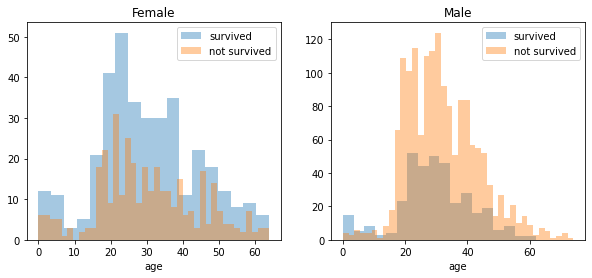

In [25]:
# Age and Sex. used code from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
# because it is cool
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_titanic[df_titanic['gender']=='Female']
men = df_titanic[df_titanic['gender']=='Male']
ax = sns.distplot(women[women['survived_y_n']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde=False)
ax = sns.distplot(women[women['survived_y_n']==1].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived_y_n']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived_y_n']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Preprocessing

In [77]:
# using LabelEncoder to transform the text into numberical data. Module 17.6.2 language
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_titanic = df_titanic.copy()
train_titanic['marital_status'] = le.fit_transform(train_titanic['marital_status'])
train_titanic['embarked'] = le.fit_transform(train_titanic['embarked'])
train_titanic['ticket_class'] = le.fit_transform(train_titanic['ticket_class'])
train_titanic['gender'] = le.fit_transform(train_titanic['gender'])
train_titanic['group'] = le.fit_transform(train_titanic['group'])
train_titanic['category'] = le.fit_transform(train_titanic['category'])
train_titanic['job_group'] = le.fit_transform(train_titanic['job_group'])
train_titanic.head()

df_index              passenger_name    born    died   age  age_at_death  \
0     1000               Cohen Gurshon  1892.0  1978.0  19.0          85.0   
1     1001             Colbert Patrick  1887.0  1912.0  24.0          24.0   
2     1002       Coleman Albert Edward  1883.0  1912.0  28.0          28.0   
3     1003                Coleman John  1854.0  1912.0  57.0          57.0   
4     1004  Coleridge Reginald Charles  1883.0  1912.0  29.0          29.0   

   gender  marital_status  category  ticket_class  ...  pclass survived sibsp  \
0       1               3         1             2  ...    None      NaN   NaN   
1       1               3         1             2  ...       3      0.0   0.0   
2       1               2         0             6  ...    None      NaN   NaN   
3       1               2         0             5  ...    None      NaN   NaN   
4       1               3         1             1  ...       2      0.0   0.0   

   parch   fare  boat  body country_id2 survived_y_n  group  
0    NaN    NaN  None  None         359          1.0      1  
1    0.0   7.25  None  None        1489          0.0      1  
2    NaN    NaN  None  None         360          0.0      1  
3    NaN    NaN  None  None         361          0.0      1  
4    0.0  10.50  None  None         362          0.0      1  

[5 rows x 28 columns]

In [78]:
# Drop alot as they do not inform survivability
train_titanic = train_titanic.drop(["df_index", "boat", "born", "died","passenger_name", "ticket", "age_at_death",
                                    "survived", "sibsp", "parch", "cabin", "disembarked", "job", "profession", 
                                    "country_id2", "pclass", "body", "country_of_residence"], axis = 1)
train_titanic.head()

gender  marital_status  category  ticket_class  job_group  embarked   fare  \
0       1               3         1             2          6         3    NaN   
1       1               3         1             2          6         2   7.25   
2       1               2         0             6          6         3    NaN   
3       1               2         0             5          6         0    NaN   
4       1               3         1             1          6         3  10.50   

   survived_y_n  group  
0           1.0      1  
1           0.0      1  
2           0.0      1  
3           0.0      1  
4           0.0      1

In [79]:
# Replaced NaN values with the mean
train_titanic["age"] = train_titanic["age"].fillna(train_titanic['age'].mean())
train_titanic["fare"] = train_titanic["fare"].fillna(train_titanic['fare'].mean())
train_titanic

gender  marital_status  category  ticket_class  job_group  embarked  \
0          1               3         1             2          6         3   
1          1               3         1             2          6         2   
2          1               2         0             6          6         3   
3          1               2         0             5          6         0   
4          1               3         1             1          6         3   
...      ...             ...       ...           ...        ...       ...   
2418       1               3         0             4          6         3   
2419       1               2         1             0          6         3   
2420       1               2         0             5          6         0   
2421       1               2         0             5          6         3   
2422       1               3         1             2          6         3   

           fare  survived_y_n  group  
0     43.549655           1.0      1  
1      7.250000           0.0      1  
2     43.549655           0.0      1  
3     43.549655           0.0      1  
4     10.500000           0.0      1  
...         ...           ...    ...  
2418  43.549655           0.0      1  
2419  43.549655           0.0      1  
2420  43.549655           0.0      1  
2421  43.549655           0.0      1  
2422   7.050000           0.0      1  

[2423 rows x 9 columns]

In [80]:
# count the empty values
train_titanic.isna().sum()

gender            0
marital_status    0
category          0
ticket_class      0
job_group         0
embarked          0
fare              0
survived_y_n      0
group             0
dtype: int64

In [81]:
train_titanic.dtypes

gender              int32
marital_status      int32
category            int32
ticket_class        int32
job_group           int32
embarked            int32
fare              float64
survived_y_n      float64
group               int32
dtype: object

In [82]:
# Scale the data in the DataFrame - Module 17.6.4 language
data_scaler = StandardScaler()
titanic_data_scaled = data_scaler.fit_transform(train_titanic)
titanic_data_scaled [:5]

array([[ 0.50283581, -0.08110822,  0.91335453, -0.50145989,  0.17955643,
         0.66069744,  0.        ,  1.55019027, -0.28386004],
       [ 0.50283581, -0.08110822,  0.91335453, -0.50145989,  0.17955643,
        -0.17921331, -1.2029882 , -0.6450821 , -0.28386004],
       [ 0.50283581, -0.91032856, -1.0948651 ,  1.39259672,  0.17955643,
         0.66069744,  0.        , -0.6450821 , -0.28386004],
       [ 0.50283581, -0.91032856, -1.0948651 ,  0.91908257,  0.17955643,
        -1.85903481,  0.        , -0.6450821 , -0.28386004],
       [ 0.50283581, -0.08110822,  0.91335453, -0.97497404,  0.17955643,
         0.66069744, -1.09528162, -0.6450821 , -0.28386004]])

In [83]:
titanic_data_scaled.shape

(2423, 9)

### Modeling Algorithm

In [84]:
# Preprocess the Data
# Define the features set. From Module 17.8
X = train_titanic.copy()
X = X.drop("survived_y_n", axis=1)
X.head()

gender  marital_status  category  ticket_class  job_group  embarked  \
0       1               3         1             2          6         3   
1       1               3         1             2          6         2   
2       1               2         0             6          6         3   
3       1               2         0             5          6         0   
4       1               3         1             1          6         3   

        fare  group  
0  43.549655      1  
1   7.250000      1  
2  43.549655      1  
3  43.549655      1  
4  10.500000      1

In [85]:
# Define the target set. From Module 17.8.
y = train_titanic["survived_y_n"].ravel()
y

array([1., 0., 0., ..., 0., 0., 0.])

In [86]:
# Splitting into Train and Test sets. From Module 17.8.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
# Creating a StandardScaler instance. From Module 17.8.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Classifer

In [88]:
# Create a random forest classifier. From Module 17.8.
rfc_model = RandomForestClassifier(n_estimators=300, random_state=78) 

In [89]:
# Fitting the model. From Module 17.8.
rfc_model = rfc_model.fit(X_train_scaled, y_train)

In [90]:
# Making predictions using the testing data. From Module 17.8.
predictions = rfc_model.predict(X_test_scaled)

In [91]:
print("test accuracy: ", rfc_model.score(X_train_scaled, y_train))

test accuracy:  0.8820754716981132


### Confusion Matrix

In [92]:
# Calculating the confusion matrix. From Module 17.8.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"])
cm_df

Predicted No  Predicted Yes
Actual No            461             38
Actual Yes           107            121

In [76]:
# Calculating the accuracy score. From Module 17.8.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.782668500687758

In [93]:
# Displaying results. From Module 17.8.
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted No  Predicted Yes
Actual No            461             38
Actual Yes           107            121

Accuracy Score : 0.782668500687758
Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       499
         1.0       0.76      0.53      0.63       228

    accuracy                           0.80       727
   macro avg       0.79      0.73      0.74       727
weighted avg       0.80      0.80      0.79       727



In [94]:
# Calculate feature importance in the Random Forest model. From Module 17.8.
importances = rfc_model.feature_importances_
importances

array([0.22460478, 0.08251635, 0.0208251 , 0.16644439, 0.0190634 ,
       0.06373283, 0.25224617, 0.170567  ])

In [95]:
# We can sort the features by their importance. From Module 17.8.
sorted(zip(rfc_model.feature_importances_, X.columns), reverse=True)

[(0.25224616885851603, 'fare'),
 (0.2246047761165543, 'gender'),
 (0.17056699696681143, 'group'),
 (0.16644439174706033, 'ticket_class'),
 (0.08251634953491499, 'marital_status'),
 (0.06373282523884022, 'embarked'),
 (0.020825095601025592, 'category'),
 (0.019063395936277202, 'job_group')]